In [1]:
import numpy as np
import gc
import matplotlib.pyplot as plt
from sklearn_sfa_master.sksfa import HSFA

In [8]:
data = np.load('data/data_LRoom.npy')
crop_h = 20
crop_w = 10
dim_step= 1
data = data[:, crop_h:-crop_h, crop_w:-crop_w][:, ::dim_step][:, :, ::dim_step]
gc.collect()
print(data.shape)

(22000, 30, 190, 3)


In [ ]:
# scaler = StandardScaler()
# images = scaler.fit_transform(data)
images = np.array([(image - image.min()) / (image.max() - image.min()) for image in data])
print(images[0].shape)

layer_configurations = [(10, 10, 5, 5, 5, 2)]
hsfa = HSFA(10, images.shape[1:], layer_configurations, noise_std=0.1)
hsfa = hsfa.fit(images)
slow_features = hsfa.transform(images)

(30, 190, 3)


pos 1: [-0.71502642 -1.03849339  0.97521006  0.34627699  0.05312628  0.33588373
 -0.09470545  1.18054271 -0.69583185 -0.65642895]
pos 2: [-0.63049055 -0.92279773  0.90664845  0.47008628 -0.11383405  0.28344338
 -0.08902454  0.6739075  -0.45982741 -0.21823337]
Change: [0.08453587 0.11569566 0.06856161 0.12380929 0.16696032 0.05244036
 0.00568091 0.50663521 0.23600444 0.43819558]
Max diff.: Slow feature #8


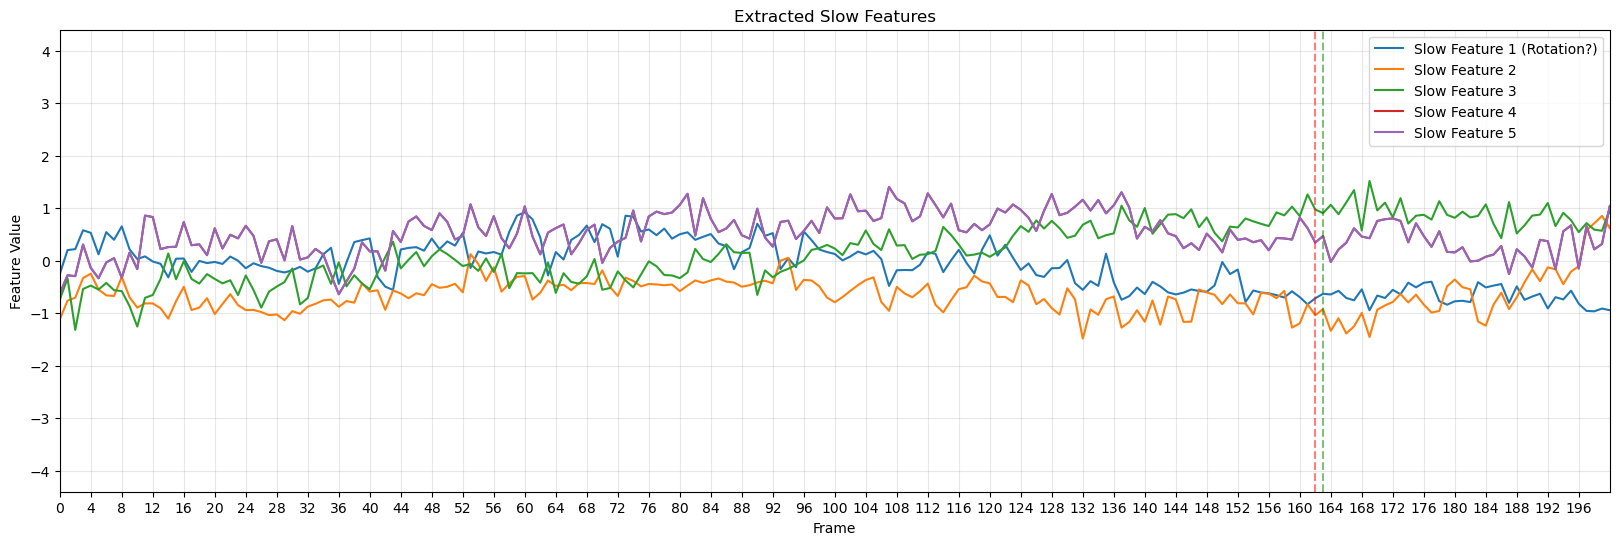

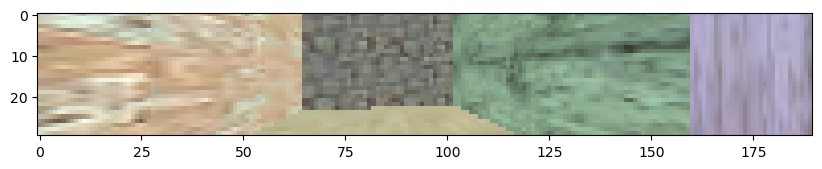

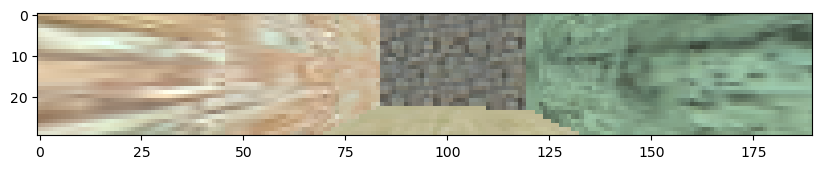

In [10]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot()

# pos. Steigung = Rotation nach links?

index1 = 162
index2 = index1+1

ax.plot(slow_features[:, 0], label="Slow Feature 1 (Rotation?)")
ax.plot(slow_features[:, 1], label="Slow Feature 2")
ax.plot(slow_features[:, 2], label="Slow Feature 3")
ax.plot(slow_features[:, 3], label="Slow Feature 4")
ax.plot(slow_features[:, 3], label="Slow Feature 5")
print('pos 1:', slow_features[index1])
print('pos 2:', slow_features[index2])
print('Change:', np.abs(slow_features[index1] - slow_features[index2]))
print(f'Max diff.: Slow feature #{np.argmax(np.abs(slow_features[index1] - slow_features[index2])) + 1}')
ax.legend()
ax.grid(alpha=.3)
hline = ax.axvline(index1, c='r', alpha=.5, linestyle='--')
hline = ax.axvline(index2, c='g', alpha=.5, linestyle='--')
plt.title("Extracted Slow Features")
plt.xlabel("Frame")
plt.ylabel("Feature Value")
length = 200
steps = 4
plt.xlim(0,length)
plt.xticks(np.arange(0, length, steps))

plt.figure(figsize=(10, 5))
plt.imshow(data[index1])
plt.figure(figsize=(10, 5))
plt.imshow(data[index2])
plt.show()

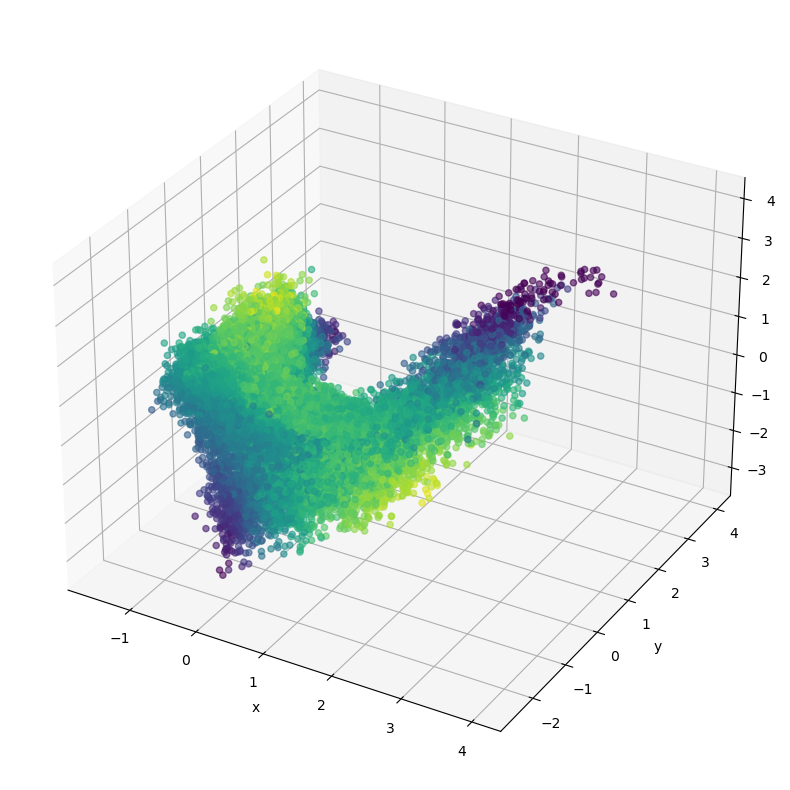

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(slow_features[:,0], slow_features[:,1], slow_features[:,2], c=slow_features[:,3], cmap='viridis', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
from minisom import MiniSom
from tqdm.notebook import tqdm
print(round(np.sqrt(100**2 + 100**2)))
som = MiniSom(200, 200, 10, sigma=3, learning_rate=0.5)
som.random_weights_init(slow_features[:,0:])
som.train(slow_features[:,0:], 5000, random_order=True, verbose=True)
winners = [som.winner(x) for x in tqdm(slow_features[:,0:])]

141
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.49420785595852024


KeyboardInterrupt: 

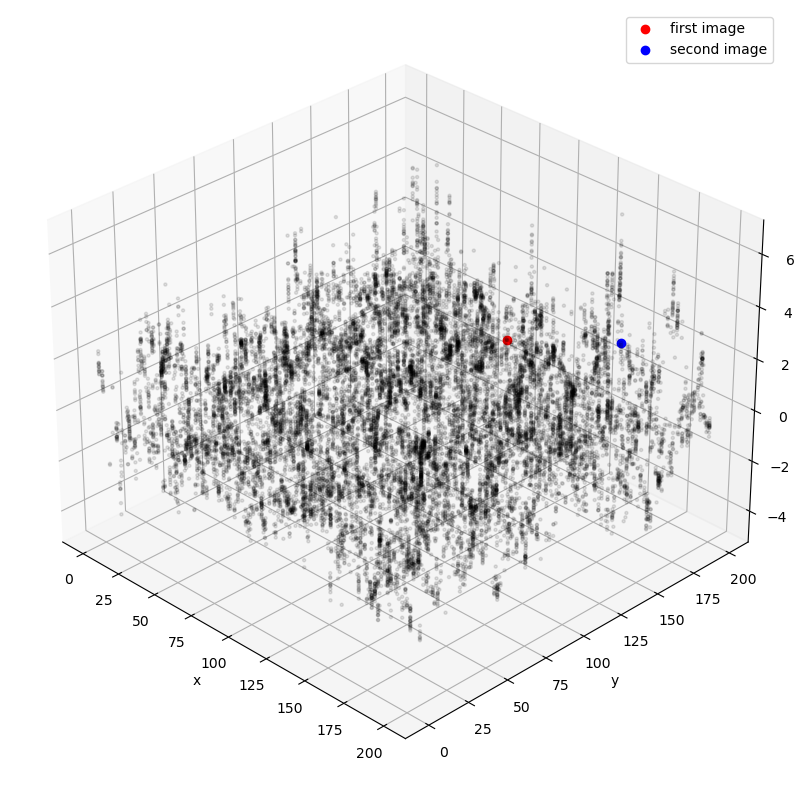

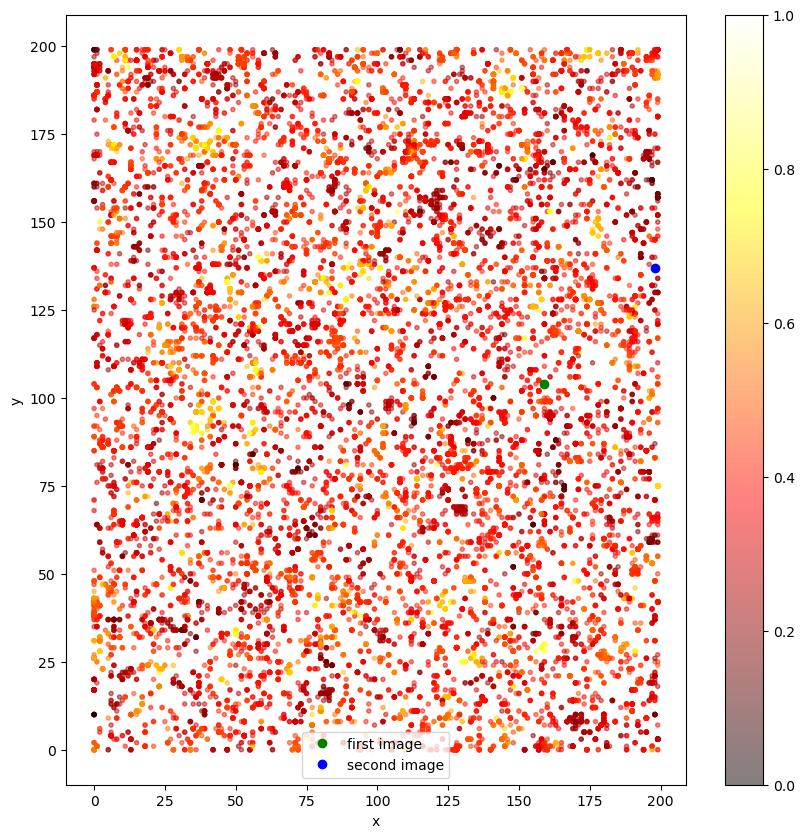

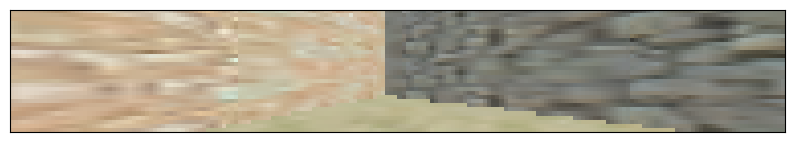

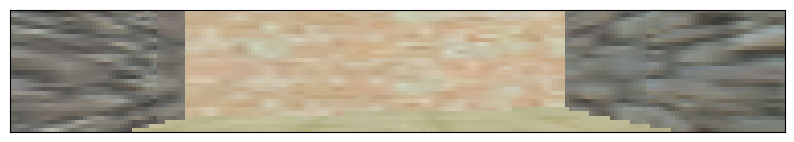

In [7]:
index = 45
index2 = index+1

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
winners = np.array(winners)
ax.scatter(winners[:,0], winners[:,1], np.add(slow_features[:,0], slow_features[:,3]), marker='.', c='black', alpha=.1)
ax.plot(winners[index,0], winners[index,1], slow_features[index,0] + slow_features[index,3], 'ro', label='first image')
ax.plot(winners[index2,0], winners[index2,1], slow_features[index2,0] + slow_features[index2,3], 'bo', label='second image')
ax.legend()
ax.view_init(elev=30, azim=-45)
plt.xlabel('x')
plt.ylabel('y')
plt.figure(figsize=(10, 10))

combined = np.add(slow_features[:,0], slow_features[:,3])
scaledRotation = (combined - np.min(combined)) / (np.max(combined) - np.min(combined))

plt.scatter(winners[:,0], winners[:,1], marker='.', c=scaledRotation, cmap='hot', alpha=.5)
cbar = plt.colorbar()
plt.plot(winners[index,0], winners[index,1], 'go', label='first image')
plt.plot(winners[index2,0], winners[index2,1], 'bo', label='second image')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.figure(figsize=(10, 6))
plt.imshow(data[index])
plt.xticks([])
plt.yticks([])
plt.figure(figsize=(10, 6))
plt.imshow(data[index2])
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
recorded_data = []
pos_data = []
for i in range(20):
    camera_file = np.load(f'recorded_data/camera_step_{i}.npy')
    pos_file = np.load(f'recorded_data/position_step_{i}.npy')
    recorded_data.append(camera_file)
    pos_data.append(pos_file)
recorded_data = np.array(recorded_data)
pos_data = np.array(pos_data)